In [318]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
pd.options.mode.chained_assignment = None

In [319]:
df = pd.read_csv('C:/Users/USER/Downloads/hw.csv')

# Исследование данных

In [320]:
df.head()

,Дата установки,Источник установки,Рекламная кампания,Показы,Клики,Затраты,Установки,Заявки,Одобрения,Активации,Утилизации,Средние балансы,Денежные обороты
0,2020-12-04,source_1,campaign1,961928,290,1262,44.0,11.0,4.0,3.0,3.0,"220,374449","155,4221167"
1,2020-12-01,source_1,campaign2,167284,182,111,35.0,2.0,1.0,0.0,0.0,NaN,NaN
2,2020-12-18,source_2,campaign3,2517,83,36,7.0,5.0,2.0,1.0,1.0,"3,918424516","20,57456667"
3,2020-12-27,source_2,campaign4,20332,5881,710,1932.0,17.0,6.0,2.0,1.0,0,0
4,2020-12-24,source_3,campaign5,183401,2818,45,301.0,71.0,6.0,1.0,1.0,0,0


In [321]:
df['Дата установки'] = pd.to_datetime(df['Дата установки'])

In [322]:
df.dtypes

Дата установки        datetime64[ns]
Источник установки            object
Рекламная кампания            object
Показы                         int64
Клики                          int64
Затраты                        int64
Установки                    float64
Заявки                       float64
Одобрения                    float64
Активации                    float64
Утилизации                   float64
Средние балансы               object
Денежные обороты              object
dtype: object

In [323]:
df['Средние балансы'] = df['Средние балансы'].str.replace(',', '.').astype(float)
df['Денежные обороты'] = df['Денежные обороты'].str.replace(',', '.').astype(float)

In [324]:
df.isna().mean()

Дата установки        0.000000
Источник установки    0.000000
Рекламная кампания    0.000000
Показы                0.000000
Клики                 0.000000
Затраты               0.000000
Установки             0.083888
Заявки                0.201065
Одобрения             0.083888
Активации             0.083888
Утилизации            0.083888
Средние балансы       0.335553
Денежные обороты      0.351531
dtype: float64

In [325]:
# Занулим денежные средства там, где количество утилизаций == 0
df['Средние балансы'] = np.where(df['Утилизации'] == 0, 0, df['Средние балансы'])
df['Денежные обороты'] = np.where(df['Утилизации'] == 0, 0, df['Денежные обороты'])

In [326]:
no_data = df.set_index('Дата установки').isna().reset_index().groupby('Дата установки').sum()

In [327]:
no_data.columns

Index(['Источник установки', 'Рекламная кампания', 'Показы', 'Клики',
       'Затраты', 'Установки', 'Заявки', 'Одобрения', 'Активации',
       'Утилизации', 'Средние балансы', 'Денежные обороты'],
      dtype='object')

In [328]:
col1 = no_data.columns[2:5]

Text(0.5, 1.0, 'Nan данные')

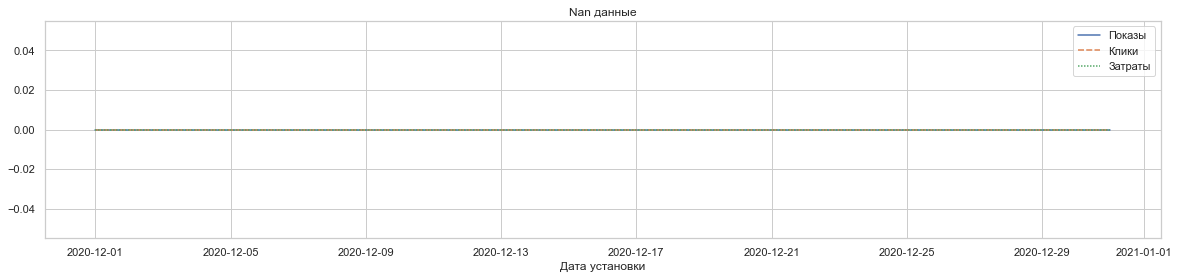

In [329]:
plt.figure(figsize=(20,4))
ax=sns.lineplot(data=no_data[col1])
ax.set_title('Nan данные')

Text(0.5, 1.0, 'Nan данные')

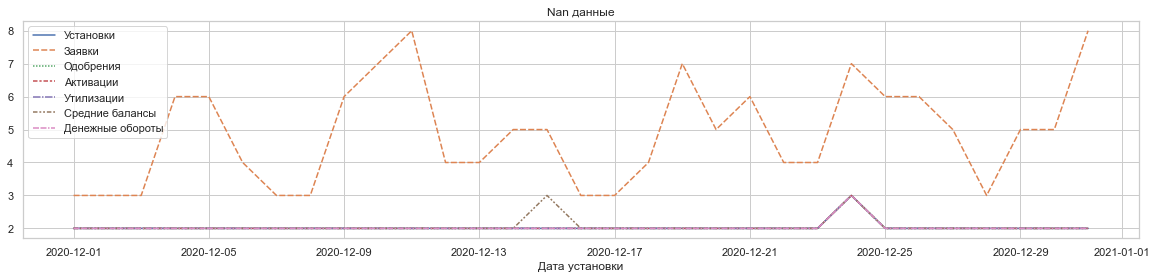

In [330]:
col2 = no_data.columns[5:]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,4))
ax = sns.lineplot(data=no_data[col2])
ax.set_title('Nan данные')

In [331]:
#Заполним пропущенные данные средним
df.fillna(df.mean(numeric_only=True), inplace=True)

In [332]:
df.isna().mean()

Дата установки        0.0
Источник установки    0.0
Рекламная кампания    0.0
Показы                0.0
Клики                 0.0
Затраты               0.0
Установки             0.0
Заявки                0.0
Одобрения             0.0
Активации             0.0
Утилизации            0.0
Средние балансы       0.0
Денежные обороты      0.0
dtype: float64

In [333]:
df['Дата установки'].agg(['min', 'max'])

min   2020-12-01
max   2020-12-31
Name: Дата установки, dtype: datetime64[ns]

# Задания

In [334]:
def conversion(df):
    cr = df[(df['Дата установки'] >= '2020-12-11') &\
        (df['Дата установки'] <= '2020-12-24') &\
        (df['Рекламная кампания'] == 'campaign17')]
    cr['conversion_rate'] = df['Утилизации'] / df['Установки']
    cr['conversion_rate'] = cr['conversion_rate'].mul(100).round(2)
    col = ['Дата установки', 'Рекламная кампания', 'Установки', 'Утилизации', 'conversion_rate']
    return cr[col].sort_values('Дата установки')

<b>1. Для рекламной кампании campaign17 рассчитать конверсию из установки в утилизацию для дат 2020-12-11 – 2020-12-24<b/>

In [335]:
conversion(df)

,Дата установки,Рекламная кампания,Установки,Утилизации,conversion_rate
377,2020-12-11,campaign17,6156.0,74.0,1.20
393,2020-12-12,campaign17,8241.0,91.0,1.10
356,2020-12-13,campaign17,9170.0,111.0,1.21
714,2020-12-14,campaign17,10542.0,120.0,1.14
259,2020-12-15,campaign17,7823.0,95.0,1.21
638,2020-12-16,campaign17,8048.0,85.0,1.06
243,2020-12-17,campaign17,7872.0,96.0,1.22
453,2020-12-18,campaign17,6769.0,85.0,1.26
296,2020-12-19,campaign17,7031.0,82.0,1.17
192,2020-12-20,campaign17,9174.0,109.0,1.19


In [344]:
def cost_per_click(df):
    sources = df.groupby('Источник установки', as_index=False).sum()
    sources['cpc'] = sources['Затраты'] / sources['Клики']
    return sources[sources['Источник установки'] == 'source_2'][['Источник установки', 'cpc']]

<b>2. Для источника source_2 рассчитать CPC суммарно за месяц<b/>


In [345]:
cost_per_click(df)

,Источник установки,cpc
1,source_2,0.144332


In [338]:
def metrics(df):
    df['ctr'] = (df['Клики'] / df['Показы']).mul(100)
    df['cpc'] = df['Затраты'] / df['Клики']
    df['cpa'] = (df['Затраты'] / df['Утилизации'])
    df['Конверсия в заявку'] = (df['Заявки'] / df['Клики']).mul(100)
    df['Конверсия в активацию'] = (df['Активации'] / df['Клики']).mul(100)
    df['Конверсия в утилизацию'] = (df['Утилизации'] / df['Клики']).mul(100)
    df.replace([np.inf, -np.inf], 0, inplace=True)
    df.fillna(0, inplace=True)
    return df

<b>3. Какой канал можно считать самым выгодным и почему?<b/>

In [346]:
sources = metrics(df.groupby('Источник установки').sum())

In [347]:
sources

,Показы,Клики,Затраты,Установки,Заявки,Одобрения,Активации,Утилизации,Средние балансы,Денежные обороты,ctr,cpc,cpa,Конверсия в заявку,Конверсия в активацию,Конверсия в утилизацию
Источник установки,,,,,,,,,,,,,,,,
source_1,168570739,222120,254460,49968.892442,9280.773333,1801.061047,930.834302,791.569767,46293.949806,34350.272413,0.131767,1.145597,321.462505,4.178270,0.419068,0.356370
source_2,4852136,518146,74785,148018.530523,10753.748333,3633.388081,1682.303779,1486.122093,82749.583223,72697.806036,10.678720,0.144332,50.322245,2.075428,0.324678,0.286815
source_3,350370213,1253829,356884,253762.000000,24103.000000,8375.000000,3623.000000,3071.000000,136124.287314,89395.604619,0.357858,0.284635,116.211006,1.922351,0.288955,0.244930


Source_2 можно считать самым выгодным, так как у него самая низкие стоимости за клик и целевое действие, достаточно высокие
конверсии в целевые действия.

<b>4.Какие инсайты можно найти по данному датасету</b>

In [348]:
df_by_days = metrics(df_by_days.groupby('Дата установки').sum())

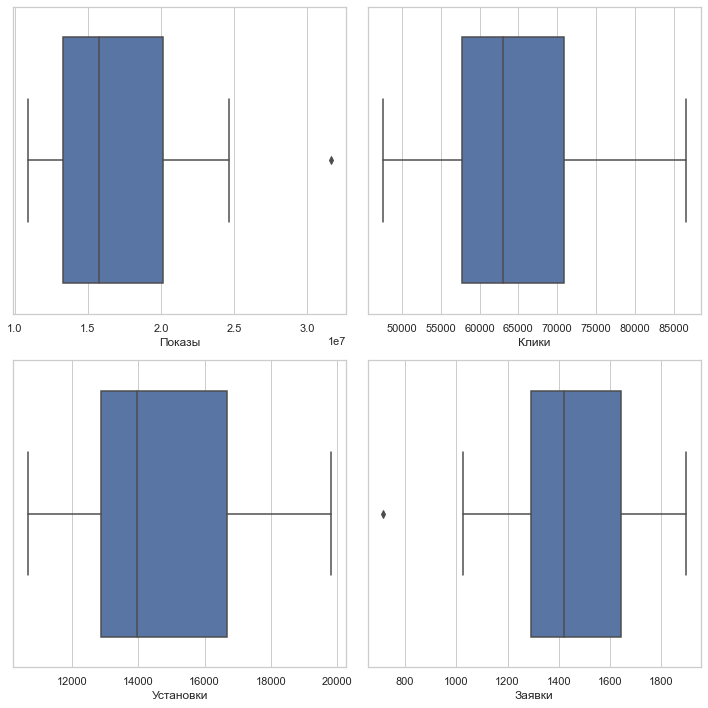

In [349]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.boxplot(x=df_by_days['Показы'], ax=axes[0,0])
sns.boxplot(x=df_by_days['Клики'], ax=axes[0,1])
sns.boxplot(x=df_by_days['Установки'], ax=axes[1, 0])
sns.boxplot(x=df_by_days['Заявки'], ax=axes[1,1])
fig.tight_layout()

Text(0.5, 1.0, 'Динамика показателей')

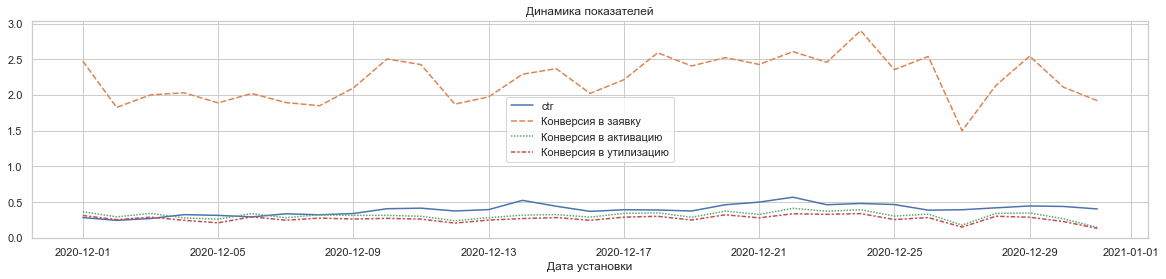

In [350]:
num_columns = ['ctr', 'Конверсия в заявку', 'Конверсия в активацию', 'Конверсия в утилизацию']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,4))
df_by_days = df_by_days
ax = sns.lineplot(data=df_by_days[num_columns])
ax.set_title('Динамика показателей')

In [352]:
df_by_days['Конверсия в заявку'].idxmin()

Timestamp('2020-12-27 00:00:00')

В датасете есть пропущенные значения, нужно бы разобраться, почему так произошло.
В целом аномалий в данных нет. Можно отметить резкое снижение конверсии в заявку 27 декабря.

# Часть 2

<b>Что такое система мобильной аналитики, какие существуют и как работают?</b>

Система мобильной аналитики - это система сбора информации о пользователях приложений.<br>
Есть трекеры: поддерживают интеграции с рекламными площадками и отслеживают источники установок<br>
Есть продуктовая аналитика: изучает аудиторию приложения и следит за основными KPI<br>

<b>В чем принципиальные отличия мобильной аналитики от веб-аналитики?</b>

Традиционный веб-сайт генерирует много данных о трафике поисковых систем. У мобильных приложений вместо статистики 
входящего трафика собираются данные о том, как часто пользователи запускают приложение, среднюю 
продолжительность сеанса и так далее.

<b>По каким показателям и с помощью каких ресурсов/инструментов можно оценить качество мобильного приложения?</b>

Будем смотреть на количество установок, MAU, DAU, CPI, CAC, Retention Rate, Churn Rate, Average Session Length, средний чек.<br>
Для отслеживания метрик будем использовать Firebase Analytics/AppMetrica.

<b>Мы – книжный онлайн-магазин, все процессы на сайте от заказа до доставки у нас уже налажены, а сейчас хотим реализовать приложение для продажи книг.
Нужно придумать реализацию (достаточно словами какие будут экраны и пр.), описать какие данные нам нужны для аналитики, как будем их собирать, описать воронку продаж.</b>

Экраны:<br>
Экран заставки<br>
Главный экран с поиском, меню<br>
Экран регистрации и входа в систему<br>
Контрольный экран (оформление заказа)<br>

Будем собирать такие же матрики (см. предыдущий ответ)

Воронка продаж:<br>
Вход в приложение<br>
Выбор товаров<br>
Корзина<br>
Оформление заказа<br>
Оплата<br>
